## Secssion 1: Twitter API 

In [3]:
import tweepy as tw
import pandas as pd
import csv
import ssl
# your Twitter API key and API secret
my_api_key = "d83LOq2Cbe2vdc2qNSIrAk0eT"
my_api_secret = "3meeaIpYOk6d7qRq3MLjncUDeARzUSmXB8S8Yb9PogfU4mkTit"
# authenticate
auth = tw.OAuthHandler(my_api_key, my_api_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [4]:
# Collect tweets
#test
for tweets in api.search_tweets(q="#nuclearwar ", lang="en",since_id=1498141004179910662,count=5):
    print(tweets.text)

Vladimir Putin to send &amp;#39;doomsday&amp;#39; message to West on Victory Day https://t.co/YZyaxE12lc via @MetroUK… https://t.co/UOJGS0HzzS
RT @GranataLLC: Nuclear War Games between the US and Russia. An amazing #opensource project by @DavidTeter. 

Based on public information a…
RT @GranataLLC: Nuclear War Games between the US and Russia. An amazing #opensource project by @DavidTeter. 

Based on public information a…
~THE ONLY WAY TO EVEN THE SCORE, IS WITH A #NUCLEARWAR!!!!!~ 🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣🤣
~@NATO--&gt;A #NUCLEARWAR WILL START BECAUSE OF THE THINGS THAT YOU CONTINUE TO DO!!! BUT, HEY, I'M OK WITH THAT, BECA… https://t.co/0qsKKahGo2


In [5]:
tweetsSearch= api.search_tweets(q="#nuclearwar", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_nuc =pd.DataFrame(list,columns = ['nuclearwar'])  
df_nuc.head()

nuclearwar
0  Vladimir Putin to send &amp;#39;doomsday&amp;#...
1  RT @GranataLLC: Nuclear War Games between the ...
2  RT @GranataLLC: Nuclear War Games between the ...
3  ~THE ONLY WAY TO EVEN THE SCORE, IS WITH A #NU...
4  ~@NATO--&gt;A #NUCLEARWAR WILL START BECAUSE O...

In [6]:
df_nuc.shape

(100, 1)

In [7]:
tweetsSearch= api.search_tweets(q="#nike", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_nike =pd.DataFrame(list,columns = ['nike']) 

In [8]:
print(df_nike.shape)
df_nike.head()

(99, 1)


nike
0  😁😁😁😁Happy Birthday to Me! #Union2 #UnionJordan...
1  RT @JulezFit21: I usually never check my phone...
2  Introducing the SneakerheadNFT J5\n\nGet it no...
3  Boston Celtics Vs Golden State Warriors: NBA F...
4  So good I had to share! Check out all the item...

In [9]:
tweetsSearch= api.search_tweets(q="#gasprices", lang="en",count=10000)
#making tweets as a list
list= [[tweets.text] for tweets in tweetsSearch]
#making the list to pandas dataframe
df_gas=pd.DataFrame(list,columns = ['gasprices']) 

In [10]:
df_gas.shape

(69, 1)

## Secssion 2: Tweets analysis

In [12]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.7/220.7 kB 1.9 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=158428 sha256=77583b72215d3d4873e1dfc2652a9fe781d2a41bd359a684f90c25629703c7e1
  Stored in directory: /Users/XiangLi/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built wordcloud


In [14]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [15]:
# Importing the dataset
#DATASET_COLUMNS=['target','ids','date','flag','user','text']
#DATASET_ENCODING = "ISO-8859-1"
#dataset = pd.read_csv('data_X.csv')#, encoding=DATASET_ENCODING, names=DATASET_COLUMNS)
#dataset.sample(5)

In [16]:
#dataset.head()

In [18]:
#dataset.info()

## Data Preprocessing 

In [19]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [20]:
# Cleaning and removing the above stop words list from the tweet text
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda text: cleaning_stopwords(text))
df_nike['nike'] = df_nike['nike'].apply(lambda text: cleaning_stopwords(text))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_stopwords(text))

df_nuc['nuclearwar'].head()

0    Vladimir Putin send &amp;#39;doomsday&amp;#39;...
1    RT @GranataLLC: Nuclear War Games US Russia. A...
2    RT @GranataLLC: Nuclear War Games US Russia. A...
3    ~THE ONLY WAY TO EVEN THE SCORE, IS WITH A #NU...
4    ~@NATO--&gt;A #NUCLEARWAR WILL START BECAUSE O...
Name: nuclearwar, dtype: object

In [21]:
# Cleaning and removing punctuations 
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_nuc['nuclearwar']= df_nuc['nuclearwar'].apply(lambda x: cleaning_punctuations(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_punctuations(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_punctuations(text))
df_nuc['nuclearwar'].tail()


95    RT AtomicReporters No Nukes Vienna 2022 – Week...
96    Has US net benefit world Poll nuclearwar Ukrai...
97    RT ENDInfo END Info 32 Expanding Nuclear Bootp...
98    RT ENDInfo END Info 32 Expanding Nuclear Bootp...
99    END Info 32 Expanding Nuclear Bootprint Downlo...
Name: nuclearwar, dtype: object

In [22]:
# Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_repeating_char(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_repeating_char(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_repeating_char(text))

df_nuc['nuclearwar'].tail()

95    RT AtomicReporters No Nukes Vienna 2022 – Week...
96    Has US net benefit world Poll nuclearwar Ukrai...
97    RT ENDInfo END Info 32 Expanding Nuclear Bootp...
98    RT ENDInfo END Info 32 Expanding Nuclear Bootp...
99    END Info 32 Expanding Nuclear Bootprint Downlo...
Name: nuclearwar, dtype: object

In [23]:
# Cleaning and removing URL’s 
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_URLs(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_URLs(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_URLs(text))
print(df_nike['nike'][89])

Get ready Spring Summer Shop latest Nike ideas shopping trending influencers online sale… httpstcod1gDAKlSv


In [24]:
# Cleaning and removing Numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_nuc['nuclearwar'] = df_nuc['nuclearwar'].apply(lambda x: cleaning_numbers(x))
df_nike['nike'] = df_nike['nike'].apply(lambda x: cleaning_numbers(x))
df_gas['gasprices'] = df_gas['gasprices'].apply(lambda text: cleaning_numbers(text))
df_nuc['nuclearwar'].tail()

95    RT AtomicReporters No Nukes Vienna  – Week nuc...
96    Has US net benefit world Poll nuclearwar Ukrai...
97    RT ENDInfo END Info  Expanding Nuclear Bootpri...
98    RT ENDInfo END Info  Expanding Nuclear Bootpri...
99    END Info  Expanding Nuclear Bootprint Download...
Name: nuclearwar, dtype: object

In [27]:
# import SentimentIntensityAnalyzer class
# from vaderSentiment.vaderSentiment module.
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# function to print sentiments
# of the sentence.
def sentiment_scores(data):
    
    data_neg = []
    data_pos = []
    data_neu = []
    
    for sentence in data: 
        
        # Create a SentimentIntensityAnalyzer object.
        sid_obj = SentimentIntensityAnalyzer()

        # polarity_scores method of SentimentIntensityAnalyzer
        # object gives a sentiment dictionary.
        # which contains pos, neg, neu, and compound scores.
        sentiment_dict = sid_obj.polarity_scores(sentence)

        # decide sentiment as positive, negative and neutral
        if sentiment_dict['compound'] >= 0.05 :
            data_pos.append(sentence)

        elif sentiment_dict['compound'] <= - 0.05 :
            data_neg.append(sentence)
        else :
            data_neu.append(sentence)
    
    
    return data_neg, data_pos, data_neu

In [28]:
# confirming the status of each tweet

data_neg_nuc, data_pos_nuc, data_neu_nuc = sentiment_scores(df_nuc['nuclearwar'])
data_neg_nike, data_pos_nike, data_neu_nike = sentiment_scores(df_nike['nike'])
data_neg_gas, data_pos_gas, data_neu_gas = sentiment_scores(df_gas['gasprices'])
n_neg = len(data_neg_nuc)
n_pos = len(data_pos_nuc)
n_neu = len(data_neu_nuc)
print('nuclearwar')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos, n_neg, n_neu))

n_neg_nike = len(data_neg_nike)
n_pos_nike = len(data_pos_nike)
n_neu_nike = len(data_neu_nike)
print('Nike')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos_nike, n_neg_nike, n_neu_nike))

n_neg_gas = len(data_neg_gas)
n_pos_gas = len(data_pos_gas)
n_neu_gas = len(data_neu_gas)
print('gasprices')
print(' Number of Positive tweeets: {}\n Number of Negative tweeets: {}\n Number of Neutral tweeets: {}\n'.format(n_pos_gas, n_neg_gas, n_neu_gas))


nuclearwar
 Number of Positive tweeets: 29
 Number of Negative tweeets: 47
 Number of Neutral tweeets: 24

Nike
 Number of Positive tweeets: 57
 Number of Negative tweeets: 8
 Number of Neutral tweeets: 34

gasprices
 Number of Positive tweeets: 16
 Number of Negative tweeets: 17
 Number of Neutral tweeets: 36



<Figure size 720x720 with 0 Axes>

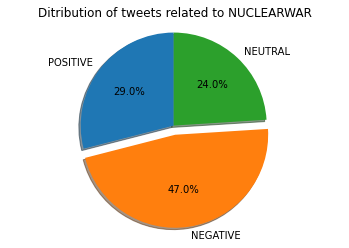

In [29]:
# Pie chart of positive negative and neutral tweets of Nuclearwar:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos, n_neg, n_neu]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Negtative')

plt.figure(figsize = (10,10))

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to NUCLEARWAR')

plt.savefig('piechart_nuclearwar.png')
plt.show()


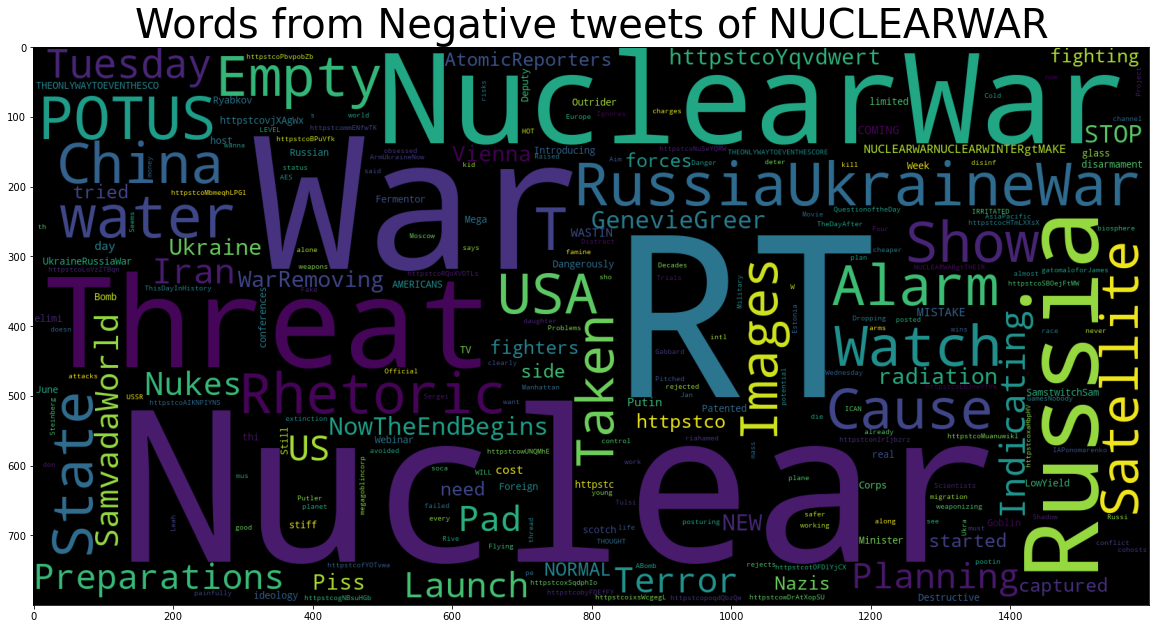

In [30]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_nuc))
plt.title('Words from Negative tweets of NUCLEARWAR',fontsize = 40)
plt.imshow(wc)

plt.savefig('neg_nuclearwar.png')


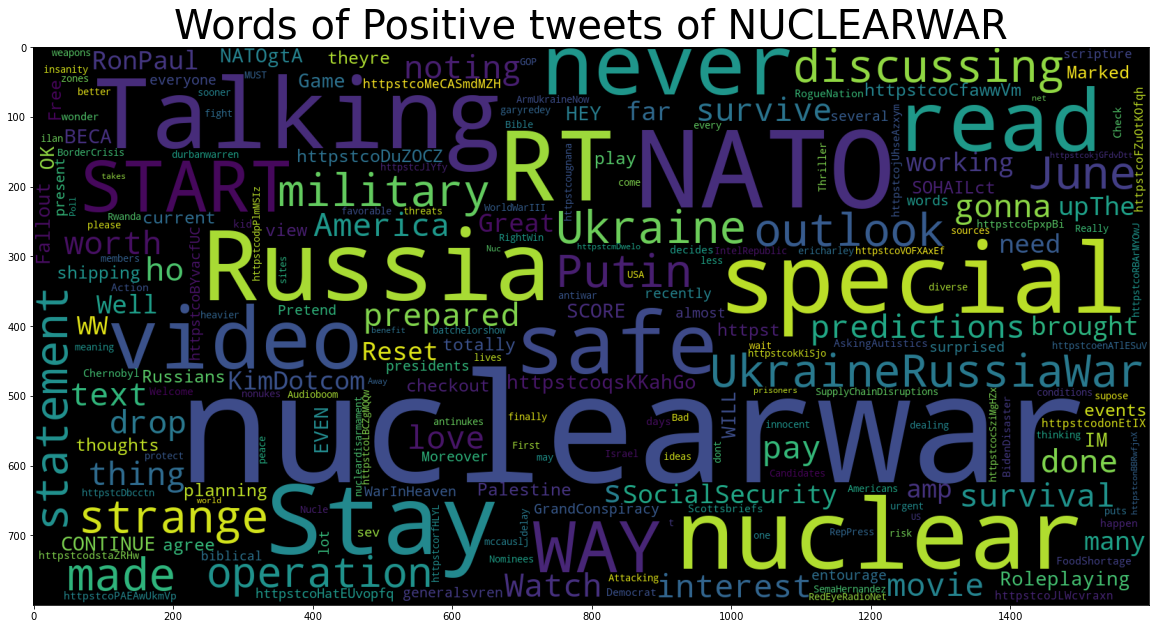

In [31]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_nuc))
plt.title('Words of Positive tweets of NUCLEARWAR',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_nuclearwar.png')

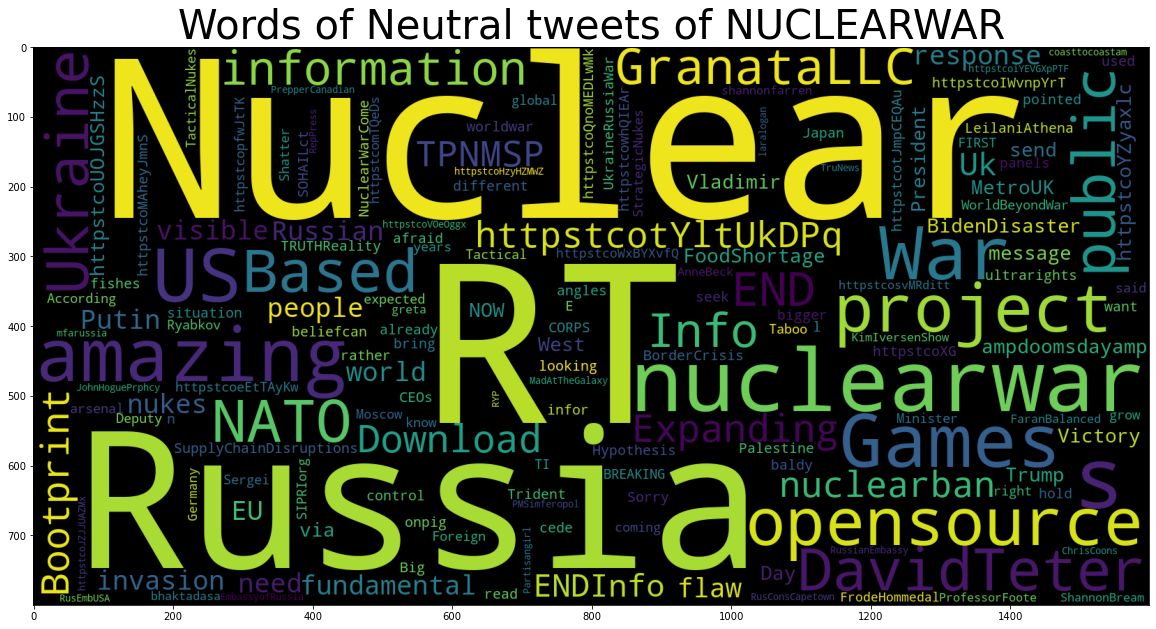

In [32]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_nuc))
plt.title('Words of Neutral tweets of NUCLEARWAR',fontsize = 40)


plt.imshow(wc) 

plt.savefig('neu_nuclearwar.png')

### Plots of Nike 

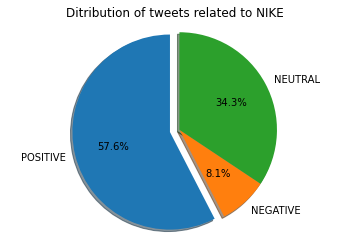

In [33]:
# Pie chart of positive negative and neutral tweets of Nike:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos_nike, n_neg_nike, n_neu_nike]
explode = (0.1, 0, 0)  # only "explode" the 1st slice (i.e. 'Positive')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to NIKE')

plt.savefig('piechart_nike.png')
plt.show()


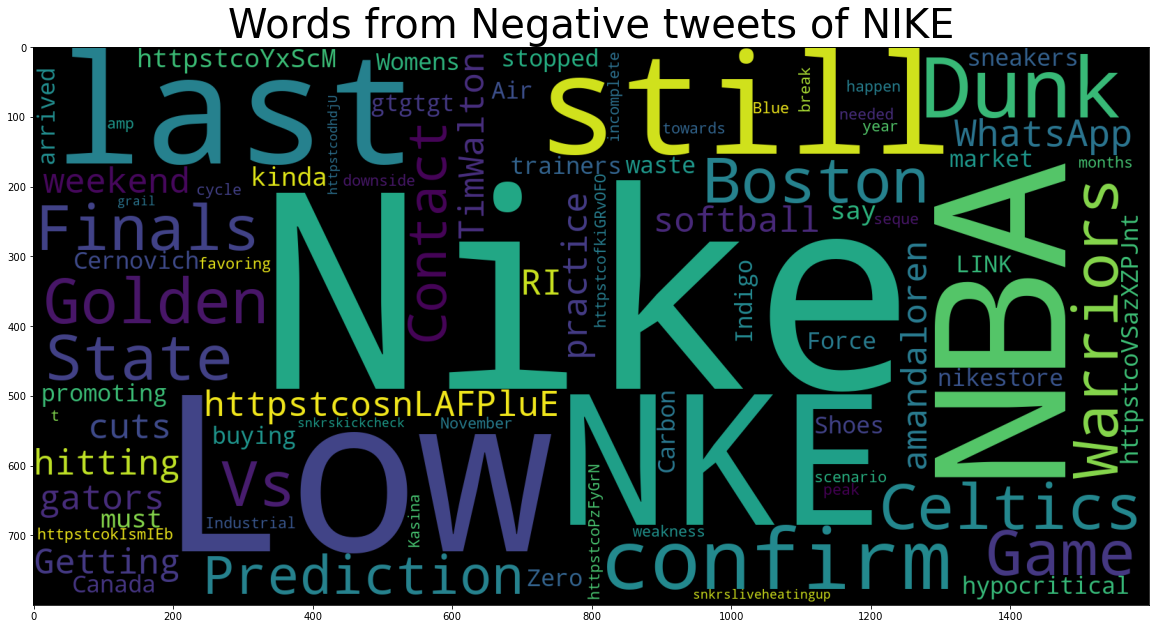

In [34]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_nike))
plt.title('Words from Negative tweets of NIKE',fontsize = 40)

plt.imshow(wc)
plt.savefig('neg_nike.png')

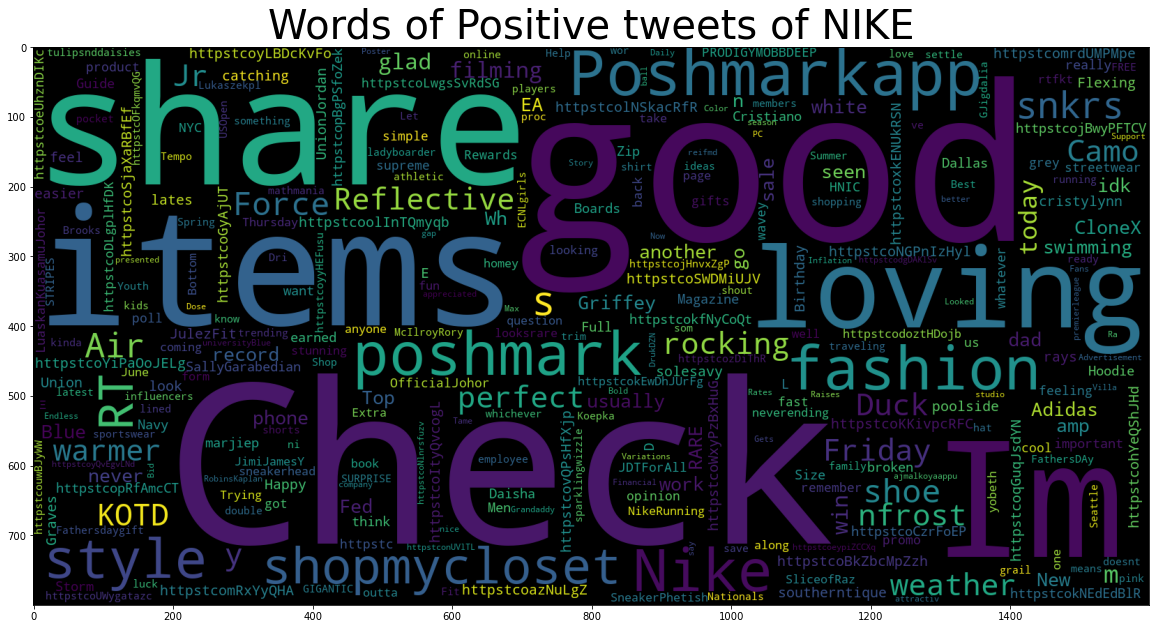

In [35]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_nike))
plt.title('Words of Positive tweets of NIKE',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_nike.png')

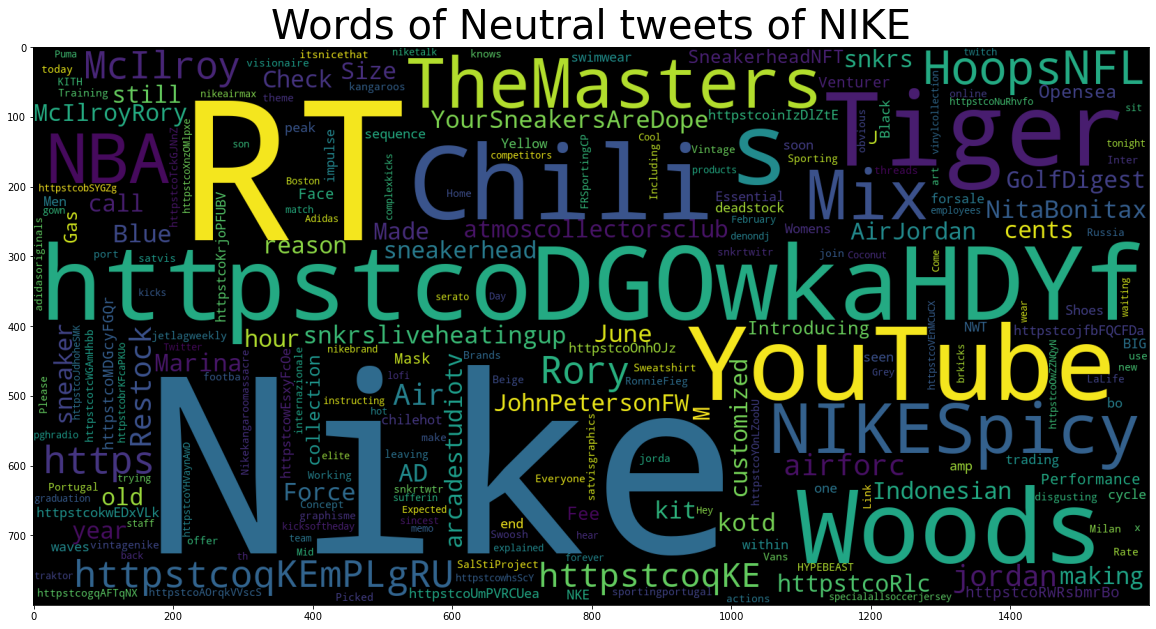

In [36]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_nike))
plt.title('Words of Neutral tweets of NIKE',fontsize = 40)


plt.imshow(wc)

plt.savefig('neu_nike.png')

### Plots of Gasprices 

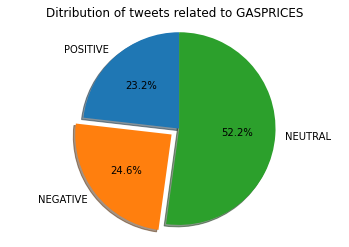

In [37]:
# Pie chart of positive negative and neutral tweets of Nike:
labels = 'POSITIVE', 'NEGATIVE', 'NEUTRAL'
sizes = [n_pos_gas, n_neg_gas, n_neu_gas]
explode = (0, 0.1, 0)  # only "explode" the 2nd slice (i.e. 'Negtative')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Ditribution of tweets related to GASPRICES')

plt.savefig('piechart_gas.png')
plt.show()


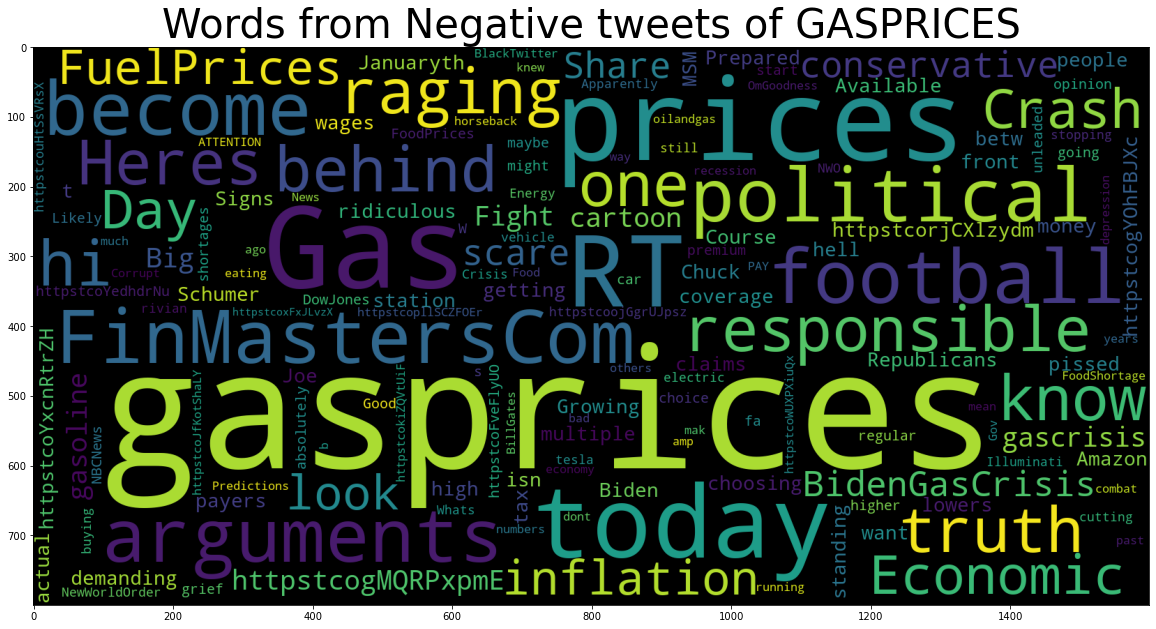

In [38]:
# Plot a cloud of words for negative tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neg_gas))
plt.title('Words from Negative tweets of GASPRICES',fontsize = 40)

plt.imshow(wc)

plt.savefig('neg_gas.png')

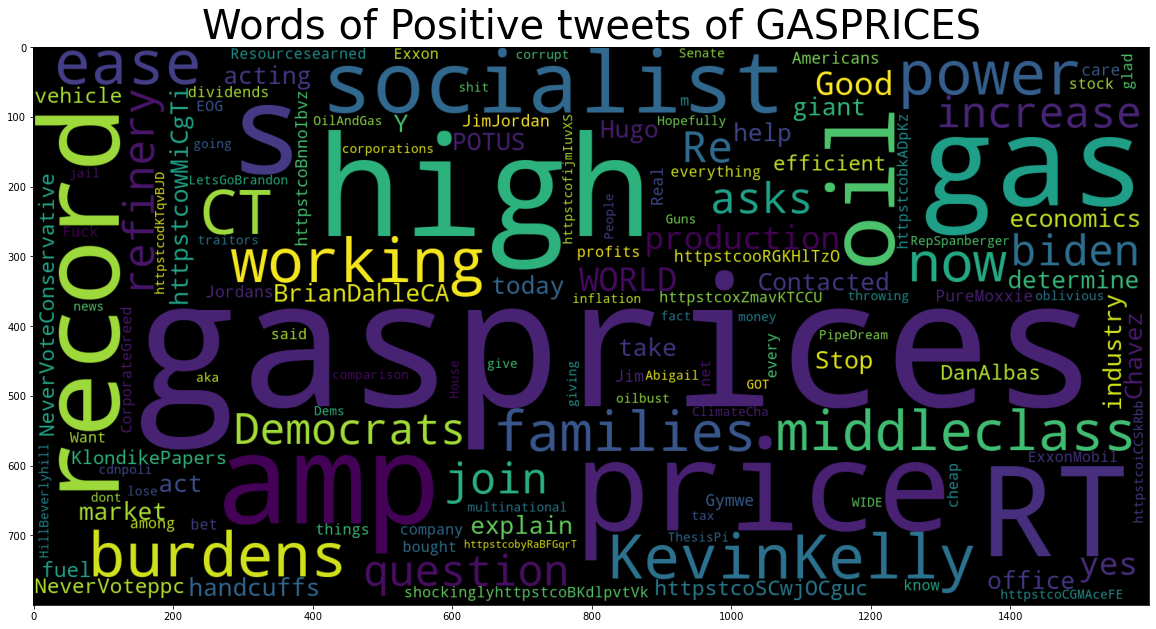

In [39]:
# Plot a cloud of words for positive tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_pos_gas))
plt.title('Words of Positive tweets of GASPRICES',fontsize = 40)

plt.imshow(wc)
plt.savefig('pos_gas.png')

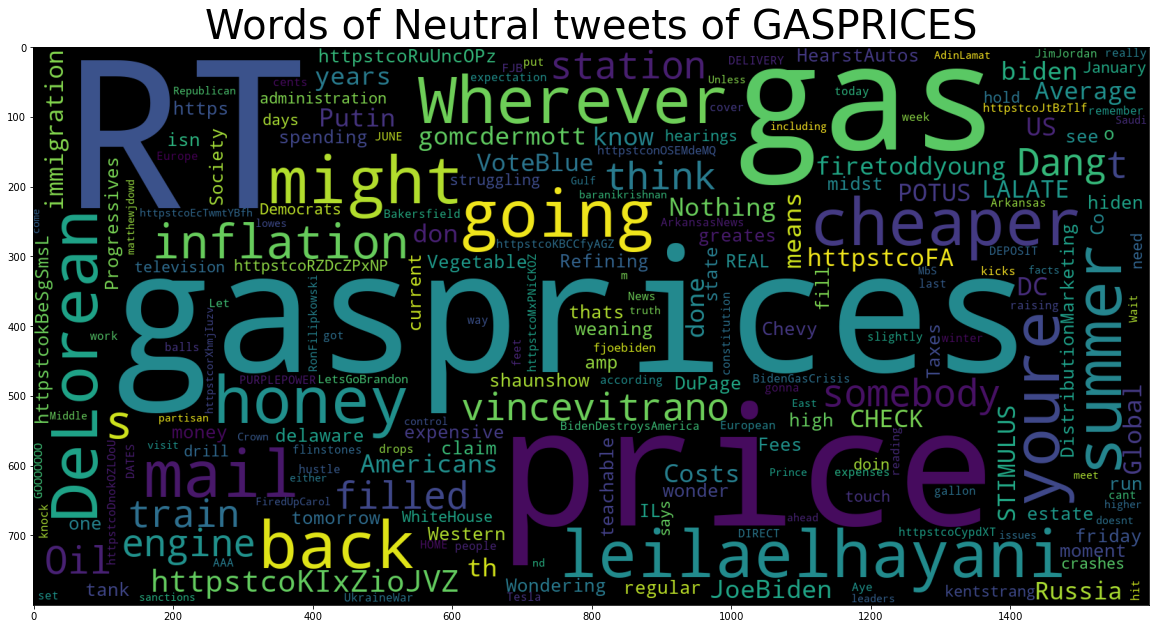

In [40]:
# Plot a cloud of words for neutral tweets

plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(review for review in data_neu_gas))
plt.title('Words of Neutral tweets of GASPRICES',fontsize = 40)


plt.imshow(wc)
plt.savefig('neu_gas.png')